In [1]:
# Sql Alchemy Script
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x195e6a05ef0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x195e6a4b828>,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397'}

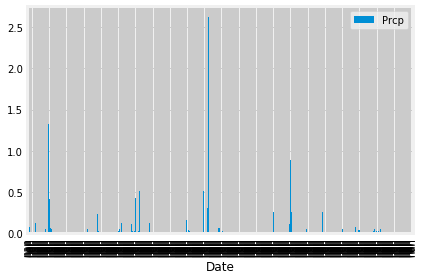

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = list(np.ravel(max_date))[0]
max_date = dt.datetime.strptime(max_date, '%Y-%m-%d')
#print(max_date)

latest_year = int(dt.datetime.strftime(max_date, '%Y'))
latest_month = int(dt.datetime.strftime(max_date, '%m'))
latest_day = int(dt.datetime.strftime(max_date, '%d'))

before_date = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)
before_date = dt.datetime.strftime(before_date, '%Y-%m-%d')
#print(before_date)

# Perform a query to retrieve the data and precipitation scores

lst_year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= before_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
#print(lst_year_prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
# I don't know why you wanted us to sort this data when it is easier to do it when you pull the data
# dropped dates with NAN values

lyp_df = pd.DataFrame(lst_year_prcp, columns=['Date', 'Prcp'])
lyp_df.set_index('Date', inplace=True)
lyp_df = lyp_df.sort_values(by=['Date'])
lyp_df = lyp_df.dropna()
#print(df)

# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(lyp_df, columns=['Date', 'Prcp',])
df.set_index('Date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
#  Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# Design a query to show how many stations are available in this dataset?

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
